In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_trained_model.h5'


In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [8]:
epochs=1
history= model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 206s 4ms/step - loss: 1.8707 - acc: 0.3121 - val_loss: 1.5664 - val_acc: 0.4400


In [9]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


10000/10000 [==============================] - 9s 921us/step
Test loss: 1.5663959861755372
Test accuracy: 0.44


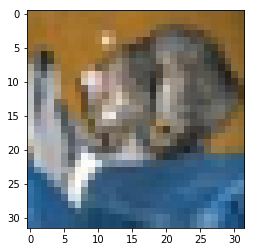

In [10]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                 'horse', 'ship', 'truck']

img = x_test[0]
plt.imshow(img)
plt.show()

In [13]:
import numpy as np
print('this image is a: ', cifar_classes[np.argmax(y_test[0])] )


this image is a:  cat


In [14]:
predictions = model.predict(x_test)
print(predictions)

[[0.03807202 0.03104587 0.12339802 ... 0.02364406 0.0552172  0.02303987]
 [0.14633915 0.20582882 0.00632014 ... 0.00162239 0.5169798  0.11789124]
 [0.19510439 0.08769138 0.04198371 ... 0.01331195 0.54790175 0.07196958]
 ...
 [0.01505482 0.01213271 0.08582062 ... 0.19299437 0.01214878 0.01719119]
 [0.13125096 0.12873586 0.06824291 ... 0.18716384 0.04238258 0.06576134]
 [0.01915939 0.00425948 0.08754563 ... 0.481663   0.01017426 0.01331252]]


In [15]:
print('The predicted class is a: ', cifar_classes[np.argmax(predictions[0])] )

this image is a:  cat
